In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from CustomTransformers import TimeSeriesFreqRegularization

DATE_SHIFT = True

In [2]:
# Matriz con fechas y valores
data = [
    ['2023-01-01 00:00:00', 10],
    ['2023-01-01 00:01:00', 20],
    ['2023-01-01 00:01:30', 30],
    ['2023-01-01 00:02:00', 40],
    ['2023-01-01 00:03:00', 50],
    ['2023-01-01 00:03:30', 60],
    ['2023-01-01 00:03:35', 70],
    ['2023-01-01 00:03:40', 80],
    ['2023-01-01 00:04:00', 90],
    ['2023-01-01 00:04:20', 100],
    ['2023-01-01 00:04:50', 110],
    ['2023-01-01 00:05:00', 120],
    ['2023-01-01 00:05:30', 130],
]

# Crear DataFrame
df = pd.DataFrame(data, columns=['date', 'value'])

if(DATE_SHIFT):
    df["date"] = pd.to_datetime(df["date"]) + pd.Timedelta(seconds=2)


# Convertir columna 'date' a datetime y ponerla como índice
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')


Solo deteccion de frecuencia dominante

In [4]:
tsr = TimeSeriesFreqRegularization(columns=['value'])
tsr.fit(df)
print(f"Frecuencia: {tsr.most_frequent_frequency_}s")

Frecuencia: 30s


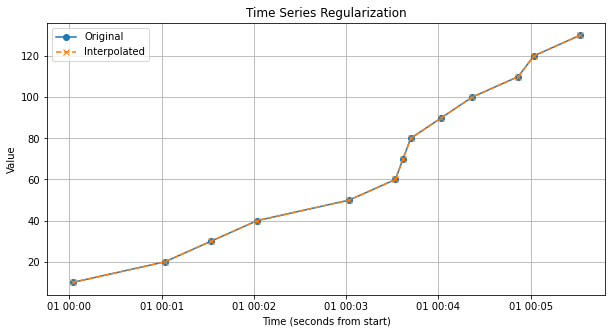

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['value'], label='Original', marker='o')
plt.plot(df.index, df['value'], label='Interpolated', linestyle='--', marker='x')
plt.xlabel('Time (seconds from start)')
plt.ylabel('Value')
plt.title('Time Series Regularization')
plt.legend()
plt.grid()
plt.show()

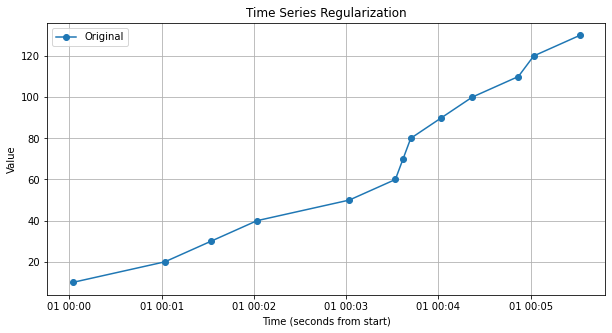

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['value'], label='Original', marker='o')
plt.xlabel('Time (seconds from start)')
plt.ylabel('Value')
plt.title('Time Series Regularization')
plt.legend()
plt.grid()
plt.show()

In [66]:

# Filtrar para mantener solo los índices con frecuencia de 30 segundos
#df_interp['es_original'] = df_interp.index.isin(df.index)
df_interp = df_interp[df_interp.index.isin(pd.date_range(df.index.min(), df.index.max(), freq='30s'))]

In [67]:
df_interp

,value
2023-01-01 00:00:02,10.000000
2023-01-01 00:00:32,15.000000
2023-01-01 00:01:02,20.000000
2023-01-01 00:01:32,30.000000
2023-01-01 00:02:02,40.000000
2023-01-01 00:02:32,45.000000
2023-01-01 00:03:02,50.000000
2023-01-01 00:03:32,60.000000
2023-01-01 00:04:02,90.000000
2023-01-01 00:04:32,103.333333


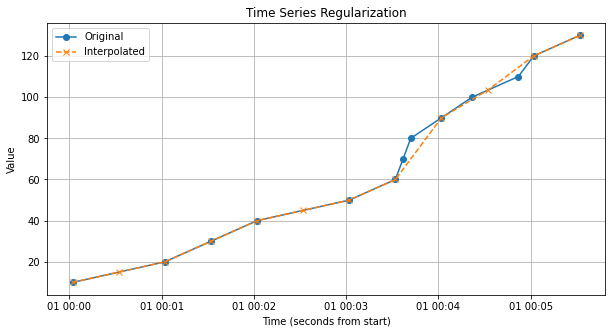

In [68]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['value'], label='Original', marker='o')
plt.plot(df_interp.index, df_interp['value'], label='Interpolated', linestyle='--', marker='x')
plt.xlabel('Time (seconds from start)')
plt.ylabel('Value')
plt.title('Time Series Regularization')
plt.legend()
plt.grid()
plt.show()